In [ ]:
!pip install fastaudio

In [ ]:
!pip install -U fastai
# If weird torch install error thing shows up, go into path, replace erroneous line with the following: from torch.hub import load_state_dict_from_url

In [ ]:
!pip show fastai

In [ ]:
!pip install pydub
!pip install moviepy

In [1]:
# NO NEED TO INSTALL ANYTHING ELSE
import os
from fastai.vision.all import *
from fastaudio.core.all import *
from fastaudio.augment.all import *

C:\Users\benjy\anaconda3\Lib\site-packages\fastaudio\__init__.py:10: UserWarning: torchaudio._backend.set_audio_backend has been deprecated. With dispatcher enabled, this function is no-op. You can remove the function call.
  torchaudio.set_audio_backend(backend)
C:\Users\benjy\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [9]:
PATH_TO_DATASET = "dataset"
CLASSICAL_CODE = 0
JAZZ_CODE = 1
ROCK_CODE = 2
HIP_HOP_CODE = 3
LENGTH_OF_CLIP = 5000

fnames = get_files(PATH_TO_DATASET, extensions=".wav", recurse=True)

In [3]:
len(fnames)

18704

In [14]:
resized = 1000

cfg = AudioConfig.Voice()
aud2spec = AudioToSpec.from_cfg(cfg)
crop1s = ResizeSignal(resized)
pipe = Pipeline([AudioTensor.create, crop1s, aud2spec])

item_tfms = [ResizeSignal(resized), aud2spec]

def _get_labels(x):
    x = str(x).split("\\")[-2]
    match x:
        case "Classical": return CLASSICAL_CODE
        case "Jazz": return JAZZ_CODE
        case "Rock": return ROCK_CODE
        case "Hip Hop": return HIP_HOP_CODE
    raise Exception("Expected genre label, found " + x)

sounds = DataBlock(blocks=(AudioBlock, CategoryBlock),
                 get_items=get_audio_files,
                 splitter=RandomSplitter(),
                 item_tfms = item_tfms,
                 get_y=_get_labels)
dls = sounds.dataloaders(PATH_TO_DATASET, bs=64)
dls.valid.vocab

[0, 1, 2, 3]

In [15]:
def alter_learner(learn, n_channels=1):
  "Adjust a `Learner`'s model to accept `1` channel"
  layer = learn.model[0][0]
  layer.in_channels=n_channels
  layer.weight = nn.Parameter(layer.weight[:,1,:,:].unsqueeze(1))
  learn.model[0][0] = layer

In [16]:
learn = Learner(dls, xresnet18(), metrics=accuracy)
alter_learner(learn, 1)

SuggestedLRs(valley=0.002511886414140463)

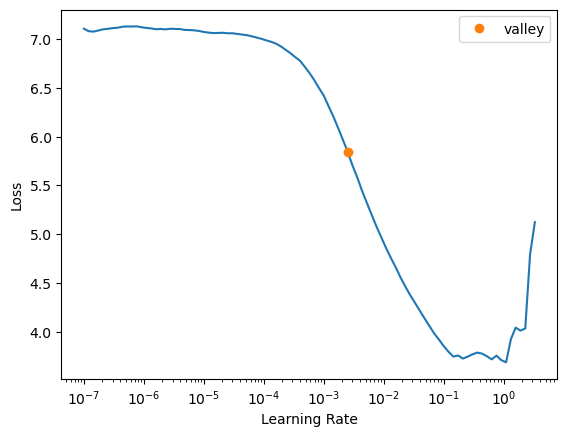

In [17]:
lr = learn.lr_find() # SuggestedLRs(valley=0.002511886414140463)
lr

SuggestedLRs(valley=4.365158383734524e-05)


In [18]:
learn.fit_one_cycle(6, 0.002511886414140463)

epoch,train_loss,valid_loss,accuracy,time
0,0.787604,0.621902,0.763636,13:58
1,0.525426,0.589866,0.778342,13:08
2,0.433685,0.455609,0.837701,13:00
3,0.354727,0.465750,0.826738,12:18
4,0.281168,0.295459,0.887968,12:16
5,0.252358,0.246633,0.907754,12:18


In [19]:
learn.export()

In [ ]:
def visualize(x,y):
    if isinstance(x, torch.Tensor):
        x = x.tolist()
    if isinstance(y, torch.Tensor):
        y = y.tolist()
    list = x[0] + x[1]
    plt.plot(np.array(list))
    if (y == 1):
        plt.xlabel("Classical clip")
    else:
        plt.xlabel("Jazz clip")
    plt.show()